In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split, KFold
from keras_tuner import HyperModel, Hyperband
from tensorflow import keras


In [52]:
data_folder = os.path.join(os.getcwd(), 'Normalized_Data')
files = os.listdir(data_folder)

In [53]:
def find_matching_files(file_list, angle, position):
    for file in file_list:
        if f"angle_{angle}" in file and f"pos_{position}" in file:
            matching_file = os.path.join(data_folder, file)
    return matching_file

In [54]:
input_pos = input("Enter Position: ")
input_deg = input("Enter Angle: ")

In [55]:
scan_df = pd.read_csv(find_matching_files(files, input_deg, input_pos))

In [56]:
scan_df[scan_df['shape'] == 'cylinder']

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,334.6875,337.5,340.3125,343.125,345.9375,348.75,351.5625,354.375,357.1875,shape
0,0.0,-0.209740,-0.199180,-0.177437,-0.143832,-0.099093,-0.045412,0.013712,0.073833,0.130064,...,-0.116952,-0.136463,-0.148978,-0.157907,-0.165987,-0.174922,-0.185175,-0.195957,-0.205412,cylinder
1,0.0,-0.323340,-0.250390,-0.159359,-0.063765,0.022703,0.088306,0.125044,0.129841,0.104949,...,0.169227,0.151215,0.097369,0.014667,-0.085190,-0.187745,-0.278117,-0.343323,-0.374252,cylinder
2,0.0,-0.101682,-0.061252,-0.010541,0.041711,0.086503,0.116055,0.125087,0.111701,0.077734,...,0.093085,0.114066,0.108805,0.080209,0.034980,-0.017714,-0.067888,-0.106421,-0.126531,cylinder
3,0.0,0.737413,0.744868,0.677782,0.542809,0.354379,0.132940,-0.097571,-0.312675,-0.490323,...,-0.582092,-0.593802,-0.549363,-0.447424,-0.293659,-0.100636,0.113314,0.326115,0.514577,cylinder
4,0.0,-0.857414,-0.670350,-0.428534,-0.151935,0.135791,0.409910,0.647330,0.829109,0.942443,...,0.085888,-0.028790,-0.183521,-0.365610,-0.557497,-0.738639,-0.887882,-0.986002,-1.018110,cylinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder
1965,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder
1966,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder
1967,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder


In [57]:
scan_data_df = scan_df

In [58]:
#scan_data_df.to_csv('scan_data.csv', index=False)

In [59]:
scan_data_df

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,334.6875,337.5,340.3125,343.125,345.9375,348.75,351.5625,354.375,357.1875,shape
0,0.0,-0.209740,-0.199180,-0.177437,-0.143832,-0.099093,-0.045412,0.013712,0.073833,0.130064,...,-0.116952,-0.136463,-0.148978,-0.157907,-0.165987,-0.174922,-0.185175,-0.195957,-0.205412,cylinder
1,0.0,-0.323340,-0.250390,-0.159359,-0.063765,0.022703,0.088306,0.125044,0.129841,0.104949,...,0.169227,0.151215,0.097369,0.014667,-0.085190,-0.187745,-0.278117,-0.343323,-0.374252,cylinder
2,0.0,-0.101682,-0.061252,-0.010541,0.041711,0.086503,0.116055,0.125087,0.111701,0.077734,...,0.093085,0.114066,0.108805,0.080209,0.034980,-0.017714,-0.067888,-0.106421,-0.126531,cylinder
3,0.0,0.737413,0.744868,0.677782,0.542809,0.354379,0.132940,-0.097571,-0.312675,-0.490323,...,-0.582092,-0.593802,-0.549363,-0.447424,-0.293659,-0.100636,0.113314,0.326115,0.514577,cylinder
4,0.0,-0.857414,-0.670350,-0.428534,-0.151935,0.135791,0.409910,0.647330,0.829109,0.942443,...,0.085888,-0.028790,-0.183521,-0.365610,-0.557497,-0.738639,-0.887882,-0.986002,-1.018110,cylinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,0.0,-0.981610,-0.904058,-0.781639,-0.620321,-0.429068,-0.219216,-0.003549,0.204843,0.393788,...,0.172145,-0.007735,-0.191698,-0.373397,-0.545915,-0.701827,-0.833441,-0.933221,-0.994378,cube
2502,0.0,-0.970628,-0.852268,-0.691316,-0.498657,-0.287315,-0.071245,0.135982,0.322432,0.478864,...,0.186177,-0.010468,-0.216345,-0.421424,-0.614582,-0.784337,-0.919741,-1.011361,-1.052228,cube
2503,0.0,-0.843642,-0.674639,-0.470399,-0.245830,-0.017304,0.199066,0.389114,0.542070,0.651555,...,-0.022147,-0.209688,-0.401673,-0.587877,-0.756591,-0.895630,-0.993584,-1.041144,-1.032341,cube
2504,0.0,-0.715471,-0.529495,-0.316809,-0.091743,0.130477,0.335299,0.510352,0.646665,0.739448,...,-0.266042,-0.431256,-0.591690,-0.739054,-0.863886,-0.956447,-1.007843,-1.011212,-0.962799,cube


In [60]:
scan_data_df.groupby('shape').size()

shape
cube        928
cylinder    789
pentagon    789
dtype: int64

In [61]:
X = scan_data_df.drop('shape', axis = 1)
y = scan_data_df['shape']

In [62]:
y

0       cylinder
1       cylinder
2       cylinder
3       cylinder
4       cylinder
          ...   
2501        cube
2502        cube
2503        cube
2504        cube
2505        cube
Name: shape, Length: 2506, dtype: object

In [63]:
y_encoded = pd.get_dummies(y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, shuffle=True)


def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=4, max_value=15, step=1),
                    input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    
    if optimizer == 'adam':
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    elif optimizer == 'sgd':
        model.compile(optimizer=keras.optimizers.SGD(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    elif optimizer == 'rmsprop':
        model.compile(optimizer=keras.optimizers.RMSprop(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    
    return model


In [65]:
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband',
    project_name='hyperparameter_tuning_object_recognition'
)

In [66]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [67]:
tuner.search(X_train, y_train, 
             epochs=10, 
             validation_data=(X_test, y_test), 
             callbacks=[stop_early])


Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.7118914723396301

Best val_accuracy So Far: 0.9984038472175598
Total elapsed time: 00h 00m 26s


In [75]:
# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# build best model
model = tuner.hypermodel.build(best_hps)

# train the best model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# evaluate the best model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")


Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.6584 - val_loss: 0.3854 - val_accuracy: 0.8396
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8524 - val_loss: 0.1952 - val_accuracy: 0.8899
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.8899 - val_loss: 0.1344 - val_accuracy: 0.8931
Epoch 4/10
40/40 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9385 - val_loss: 0.1004 - val_accuracy: 0.9968
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9984 - val_loss: 0.0776 - val_accuracy: 0.9968
Epoch 6/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9992 - val_loss: 0.0621 - val_accuracy: 0.9984
Epoch 7/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9984
Epoch 8/10
40/40 [==

In [76]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Die besten Hyperparameter sind:")
print(f" - Units: {best_hps.get('units')}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")
print(f" - Optimizer: {best_hps.get('optimizer')}")




Die besten Hyperparameter sind:
 - Units: 9
 - Learning Rate: 0.006061179201217392
 - Optimizer: adam


In [70]:

# # Aufteilung in Trainings- und Testdaten
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3)

# # Modelldefinition
# model = Sequential()
# model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(y_encoded.shape[1], activation='softmax'))

# # Modellkompilierung
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Training des Modells
# history = model.fit(X_train, y_train, epochs=4, batch_size=4, validation_data=(X_test, y_test))

# # Bewertung des Modells auf dem Testset
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# test_accuracy, test_loss


In [78]:
num_folds = 30
kf = KFold(n_splits=num_folds, shuffle=True)

# Bereite eine Liste vor, um die Ergebnisse jeder Fold zu speichern
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kf.split(X, y_encoded):
    # build best model
    model = Sequential([
        Dense(best_hps.get('units'), activation='relu', input_shape=(X_train.shape[1],)),
        Dense(y_encoded.shape[1], activation='softmax')
    ])

    model.compile(optimizer=best_hps.get('optimizer'),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    # train model
    history = model.fit(X.iloc[train], y_encoded.iloc[train],
                        epochs=5,
                        verbose=0)
    
    # evaluate model
    scores = model.evaluate(X.iloc[test], y_encoded.iloc[test], verbose=0)
    
    # save results
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    

    fold_no += 1

# print average results
print(f'Average Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Average Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')


Score for fold 1: loss of 0.09102107584476471; accuracy of 100.0%
Score for fold 2: loss of 0.1605629026889801; accuracy of 100.0%
Score for fold 3: loss of 0.27676936984062195; accuracy of 82.14285969734192%
Score for fold 4: loss of 0.22990834712982178; accuracy of 89.28571343421936%
Score for fold 5: loss of 0.11525007337331772; accuracy of 100.0%
Score for fold 6: loss of 0.21855810284614563; accuracy of 98.8095223903656%
Score for fold 7: loss of 0.2156752347946167; accuracy of 100.0%
Score for fold 8: loss of 0.14427296817302704; accuracy of 98.8095223903656%
Score for fold 9: loss of 0.21275606751441956; accuracy of 97.6190447807312%
Score for fold 10: loss of 0.1256401538848877; accuracy of 100.0%
Score for fold 11: loss of 0.1840389370918274; accuracy of 98.8095223903656%
Score for fold 12: loss of 0.14139284193515778; accuracy of 98.8095223903656%
Score for fold 13: loss of 0.15788893401622772; accuracy of 100.0%
Score for fold 14: loss of 0.17129158973693848; accuracy of 100

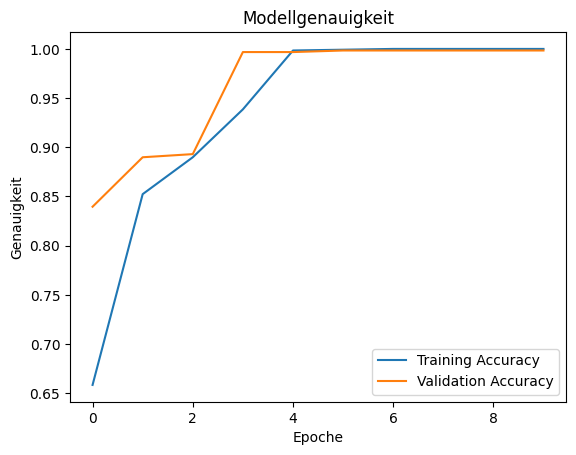

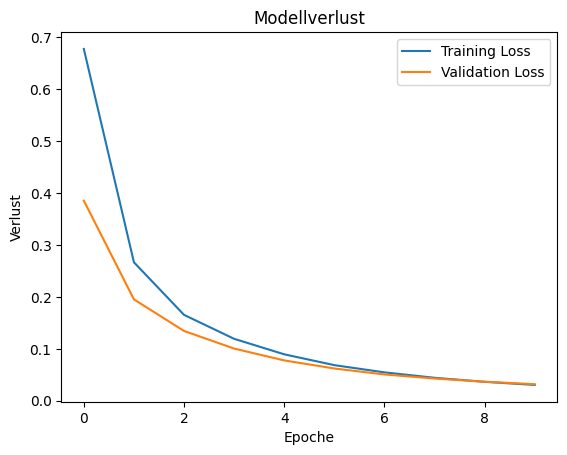

In [77]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modellgenauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Epoche')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modellverlust')
plt.ylabel('Verlust')
plt.xlabel('Epoche')
plt.legend()
plt.show()


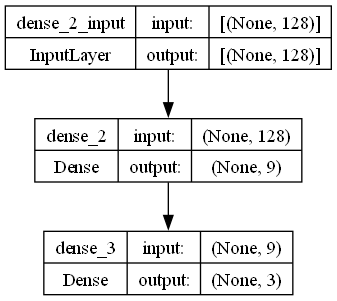

In [73]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)